In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as tick
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
%matplotlib inline

### Top 10 Remittance Receiving Countries
#### India, China, Mexico, Philippines, France, Egypt, Nigeria, Germany, Pakistan, Bangladesh

NameError: name 'inrem0' is not defined

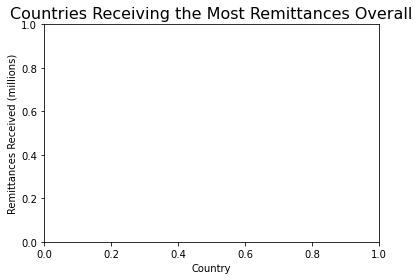

In [7]:
plt.axes(xlabel='Country', ylabel='Remittances Received (millions)')
plt.rc('font', size=14)
plt.title('Countries Receiving the Most Remittances Overall', fontsize=16)
inrem0.sort_values('total_rem', ascending=False).total_rem[2:12].plot(kind='bar', color=['g','b','k','m'], fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis

# OUTWARD REMITTANCES (sending, outgoing)

In [8]:
# Data cleaning
outrem = pd.read_excel('data/outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all').rename(columns={'Outward remittance flows (US$ million)': 'Outflow Country'})
outrem0 = outrem.replace(np.nan, 0)
outrem0.at[214, 'Outflow Country'] = 'World'    # replace Nan label with 'World' 

outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1040844565.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outflow Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
158,Russian Federation,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
98,Kazakhstan,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,3432.439705,3386.493735,3457.352394,3181.475768,2396.148204,2690.697275,2680.081028,2660.169694,2080.834887,5.267463e+04
94,Italy,428.036303,445.64582,517.182172,502.211268,499.843065,606.275815,795.433662,1286.0,1926.0,...,11821.288114,11565.682552,11135.811956,8860.397467,8677.587199,8841.573148,9906.851588,9577.332781,10187.481225,2.005503e+05
156,Qatar,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,10412.912088,11281.043956,11230.219780,12192.032967,11981.868132,12759.340659,11557.967033,11963.736264,10743.681319,1.158268e+05
203,United States,1360.000000,4720.00000,5140.000000,5450.000000,5990.000000,6330.000000,8660.000000,8810.0,9010.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06


# (GLOBAL) Countries SENDING the most remittances

In [123]:
send_countries = outrem0.rename(columns={'Outflow Country': 'outflow_country'})
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]

### Top 10 Remittance Sending Countries: 
#### US, Saudi Arabia, Switzerland, Germany, UAE, Russia, France, Juwait, UK, Luxembourg

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3389569137.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


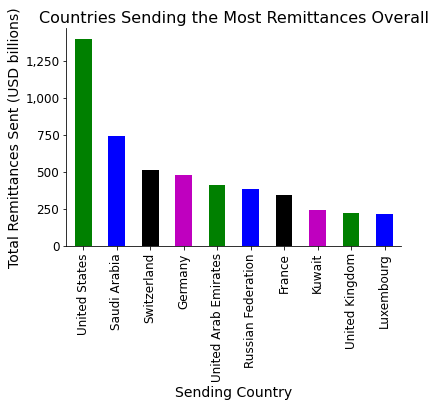

In [124]:
# Formatting
plt.rc('font', size=14)    # overall font
plt.title('Countries Sending the Most Remittances Overall', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis
colors=['salmon','blue','yellow','magenta','mediumspringgreen','powderblue','blueviolet','goldenrod','crimson']

send_countries.total_rem.head(10).plot(kind='bar', color=['g','b','k','m'], fontsize=12, xlabel='Sending Country', ylabel='Total Remittances Sent (USD billions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.show()

ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1000]    # change y-axis to billions
ax.set_yticklabels(ylabels)

plt.gca().set_yticklabels(['{:.0f}'.format(y) for y in plt.gca().get_yticks()/1000])

gca = get current axis. reformats y-axis tick labels to billions(/1000), removes '1e6' (million) multiplier from y-axis

### Top SENDERS (1-5), (6-10), (11-15)

In [11]:
send_countries = send_countries.drop('total_rem', axis=1)
# dropping aggregate column so it doesn't create outlier in trendline

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2158400041.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


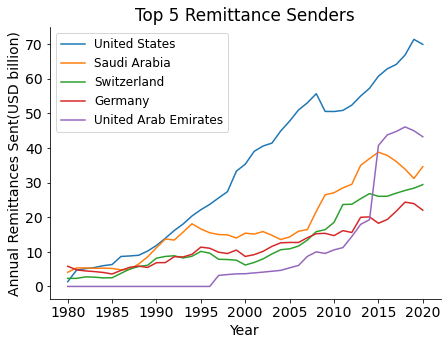

In [71]:
plt.figure(figsize=(7,5))
plt.axes(title='Top 5 Remittance Senders', xlabel='Year', ylabel='Annual Remittances Sent(USD billion)')
plt.rc('font', size=14)    # overall font
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis

for i in range(5):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)
plt.show()

## Top Senders 2020

In [227]:
out_global.shape
out_global.dtypes
pd.to_numeric(out_global.columns.values[1:42])
# same as out_global.columns.values[1:42].astype(int)
type(out_global.columns.values[33])
out_global = out_global.set_index('Outflow Country')

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1649663184.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


,2020
Outflow Country,
United States,69918.000000
United Arab Emirates,43240.299523
Saudi Arabia,34595.847461
Switzerland,29403.688397
Germany,22024.495026
China,18120.882932
Kuwait,17357.178323
Russian Federation,16872.180000
France,14632.716778


<Figure size 504x360 with 0 Axes>

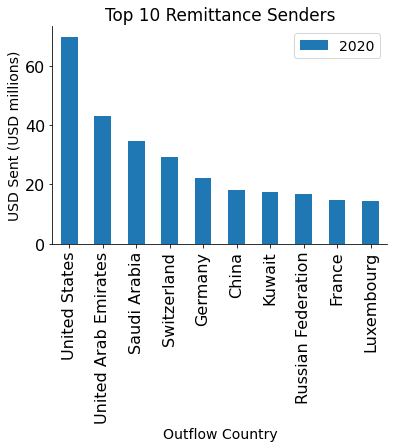

In [228]:
top2020 = out_global.sort_values(2020, ascending=False)
top2020 = pd.DataFrame(top2020[2020])

plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
top2020[:10].plot(kind='bar', ylabel='USD Sent (USD millions)', title='Top 10 Remittance Senders', fontsize=16)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])

top2020.head(10)

In [ ]:
# Top Senders 2010

top2010 = out_global.sort_values(2010, ascending=False)
top2010 = pd.DataFrame(top2010[2010])

plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
top2010[:10].plot(kind='bar', ylabel='USD Sent (USD millions)', title='Top 10 Remittance Senders', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.close('all')

##### how to make subplot   
for i in range(5):
    send_countries.iloc[i].plot()

fig, ax = plt.subplots(1, 2, figsize=(5,5))

for i in range(5):
    send_countries.iloc[i].plot()   
#ax[0, 0].plot(x, y, color='red')
#ax[0, 1].plot(x, y, color='blue')
plt.close('all')

In [226]:
# Top Senders (#6-10)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 5-10 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')
for i in range(5,10):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)
plt.close()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/173974072.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


In [225]:
# Top Senders (#11-15)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 11-15 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')

for i in range(10,15):
    send_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=12)
plt.close()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1898726357.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


In [16]:
plt.close('all')

In [17]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

#### not useful code
file = open('data/iso3166.json')
file = file.read()
iso3166 = ast.literal_eval(file)

diction = pd.DataFrame(pd.Series(iso3166)).rename(columns={0:'country'})
diction = pd.DataFrame(diction['country'].str.lower())
diction = pd.DataFrame(diction['country'].str.title())
inrem0

# Regional Remittance OUTFLOWS Analysis

In [220]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up imported column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Outflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Outflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
out_global = outrem0.merge(mapp2, on='Outflow Country', how='left')

#### Isolating countries with null continent codes to match them

In [221]:
null_cont = out_global[['Outflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:34]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/76288282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [222]:
null_cont.index
out_global.at[105, 'continentcode'] = 'AS'
out_global.at[128, 'continentcode'] = 'OC'
out_global.at[211, 'continentcode'] = 'AS'
out_global.at[13, 'continentcode'] = 'CB'
out_global.at[210, 'continentcode'] = 'AS'
out_global.at[209, 'continentcode'] = 'CB'
out_global.at[102, 'continentcode'] = 'AS'
out_global.at[101, 'continentcode'] = 'AS'
out_global.at[106, 'continentcode'] = 'AS'
out_global.at[207, 'continentcode'] = 'SA'
out_global.at[70, 'continentcode'] = 'AF'
out_global.at[190, 'continentcode'] = 'AS'
out_global.at[158, 'continentcode'] = 'EU'
out_global.at[64, 'continentcode'] = 'EU'
out_global.at[62, 'continentcode'] = 'AF'
out_global.at[57, 'continentcode'] = 'AF'
out_global.at[169, 'continentcode'] = 'CB'
out_global.at[170, 'continentcode'] = 'EU'
out_global.at[84, 'continentcode'] = 'AS'
out_global.at[142, 'continentcode'] = 'EU'
out_global.at[46, 'continentcode'] = 'AF'
out_global.at[89, 'continentcode'] = 'AS'
out_global.at[44, 'continentcode'] = 'AF'
out_global.at[43, 'continentcode'] = 'AF'
out_global.at[178, 'continentcode'] = 'CB'
out_global.at[179, 'continentcode'] = 'CB'
out_global.at[180, 'continentcode'] = 'CB'
out_global.at[181, 'continentcode'] = 'CB'
out_global.at[38, 'continentcode'] = 'EU'
out_global.at[186, 'continentcode'] = 'AS'
out_global.at[31, 'continentcode'] = 'AF'
out_global.at[27, 'continentcode'] = 'AS'

continent_dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
out_global['continent'] = out_global.continentcode.map(continent_dict)
out_global.continent.isna().describe()    # 2 with null continent ('World', 'LICs')

# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

# With these lists... create new column to identify region
out_global.shape
out_global.insert(50, 'region', np.nan)

In [223]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(out_global.shape[0]):
    if out_global.loc[index, 'Outflow Country'] in EUCA:
        out_global.loc[index, 'region'] = 'EUCA'
    elif out_global.loc[index, 'Outflow Country'] in EAP:
        out_global.loc[index, 'region'] = 'EAP'
    elif out_global.loc[index, 'Outflow Country'] in SAS:
        out_global.loc[index, 'region'] = 'SAS'
    elif out_global.loc[index, 'Outflow Country'] in WEU:
        out_global.loc[index, 'region'] = 'WEU'
    elif out_global.loc[index, 'Outflow Country'] in LAC:
        out_global.loc[index, 'region'] = 'LAC'
    elif out_global.loc[index, 'Outflow Country'] in MENA:
        out_global.loc[index, 'region'] = 'MENA'
    elif out_global.loc[index, 'Outflow Country'] in NA:
        out_global.loc[index, 'region'] = 'NA'
    elif out_global.loc[index, 'Outflow Country'] in ESAF:
        out_global.loc[index, 'region'] = 'ESAF'
    elif out_global.loc[index, 'Outflow Country'] in WCAF:
        out_global.loc[index, 'region'] = 'WCAF'
    else: pass

In [235]:
# Identify and classify countries with null regions
null_reg = out_global[out_global.region.isna()]
null_reg
out_global.at[3, 'region'] = 'EAP'
out_global.at[9, 'region'] = 'LAC'
out_global.at[13, 'region'] = 'LAC'
out_global.at[21, 'region'] = 'LAC'
out_global.at[35, 'region'] = 'LAC'
out_global.at[38, 'region'] = 'WEU'
out_global.at[43, 'region'] = 'WCAF'
out_global.at[44, 'region'] = 'WCAF'
out_global.at[46, 'region'] = 'WCAF'
out_global.at[49, 'region'] = 'LAC'
out_global.at[51, 'region'] = 'WEU'
out_global.at[57, 'region'] = 'MENA'
out_global.at[62, 'region'] = 'ESAF'
out_global.at[64, 'region'] = 'WEU'
out_global.at[68, 'region'] = 'EAP'
out_global.at[70, 'region'] = 'WCAF'
out_global.at[77, 'region'] = 'EAP'
out_global.at[84, 'region'] = 'EAP'
out_global.at[89, 'region'] = 'MENA'
out_global.at[102, 'region'] = 'EAP'
out_global.at[103, 'region'] = 'EUCA'
out_global.at[105, 'region'] = 'EUCA'
out_global.at[106, 'region'] = 'EAP'
out_global.at[115, 'region'] = 'EAP'
out_global.at[126, 'region'] = 'EAP'
out_global.at[127, 'region'] = 'EUCA'
out_global.at[137, 'region'] = 'EAP'
out_global.at[142, 'region'] = 'EUCA'
out_global.at[169, 'region'] = 'LAC'
out_global.at[170, 'region'] = 'WEU'
out_global.at[178, 'region'] = 'LAC'
out_global.at[179, 'region'] = 'LAC'
out_global.at[180, 'region'] = 'LAC'
out_global.at[181, 'region'] = 'LAC'
out_global.at[188, 'region'] = 'ESAF'
out_global.at[207, 'region'] = 'LAC'
out_global.at[209, 'region'] = 'LAC'
out_global.at[210, 'region'] = 'MENA'
out_global.at[211, 'region'] = 'MENA'

out_global = out_global[out_global['region'].notna()]

## Total Remittances Sent by Continent

In [201]:
cont = out_global.groupby('continentcode').sum()
pd.DataFrame(cont.sort_values('total_rem', ascending=False)['total_rem']).rename({'total_rem':'Total Remittances Sent (USD trillions)'},axis=1)

,Total Remittances Sent (USD trillions)
continentcode,
EU,3.202778e+06
AS,2.830178e+06
NA,1.557109e+06
AF,2.129598e+05
OC,1.297786e+05
SA,7.900194e+04
CB,5.127553e+03


/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3714696362.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


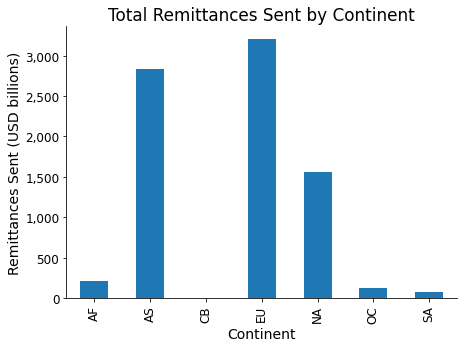

In [202]:
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

cont.total_rem.plot(kind='bar', title='Total Remittances Sent by Continent', xlabel='Continent', ylabel='Remittances Sent (USD billions)', fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## Total Remittances Sent by Region
- ### Eastern Eu & Central Asia (ECA) | East Asia & Pacific (EAP) | South Asia (SAS) |
- ### Western Eu (WEU) | Latin Am & Caribbean (LAC) | Middle East & North Af (MENA) | North Am (NA) |
- ### Eastern & Southern Africa (ESAF) | West & Central Af (WCAF)
#### Source: UNICEF regional classifications (https://data.unicef.org/regionalclassifications/)

In [42]:
regions = out_global.groupby('region').sum()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/305686203.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


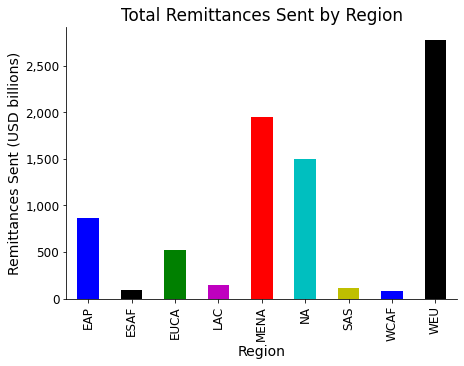

In [84]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

regions.total_rem.plot(kind='bar', title='Total Remittances Sent by Region', xlabel='Region', ylabel='Remittances Sent (USD billions)', fontsize=12, color=['b','k','g','m','r','c','y'])

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

In [70]:
prop = 100 * regions.total_rem / sum(regions.total_rem[:])
prop.plot(kind='pie', title='Regional Proportions of Total Remittances (%)', labels=round(prop, 2), legend='best')
plt.legend(regions.index, loc='upper left')
plt.close()

## Regional Remittances Sent over Time

In [73]:
regionss = regions.drop('total_rem', axis=1)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2225364467.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


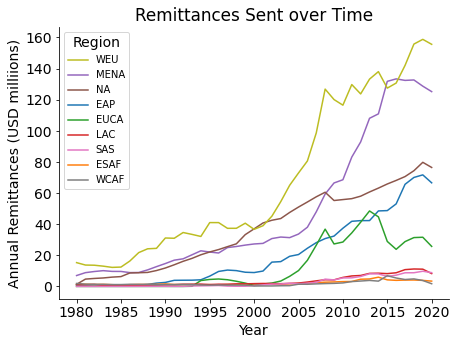

In [85]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(9):
    regionss.iloc[i].plot(title='Remittances Sent over Time', xlabel='Year', ylabel='Annual Remittances (USD milliions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
handles, labels = plt.gca().get_legend_handles_labels()    # to reorder legend labels
order = [8,4,5,0,2,3,6,1,7]    # specify order
# pass labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Region', loc='best', fontsize=10)
plt.show()

# North America Analysis

In [238]:
na = out_global.loc[out_global.region == 'NA']
na = na.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/410597403.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


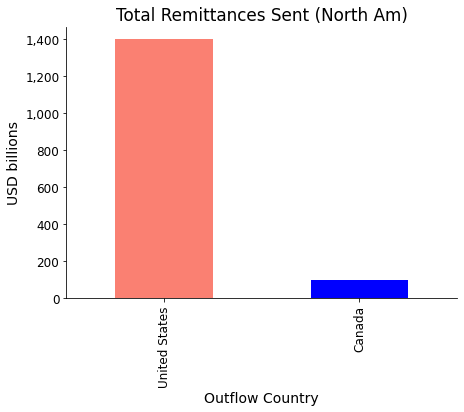

In [240]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
na.total_rem.plot(kind='bar', title='Total Remittances Sent (North Am)', ylabel='USD billions', color=colors, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### North America Trends Over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/460148357.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


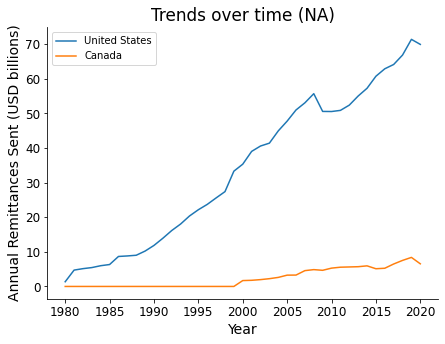

In [211]:
naa = na.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (NA)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(2):
    naa.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

# Europe Analysis

In [214]:
eu = out_global.loc[out_global.continentcode == 'EU']
eu = eu.sort_values('total_rem', ascending=False).set_index('Outflow Country')

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1488638460.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


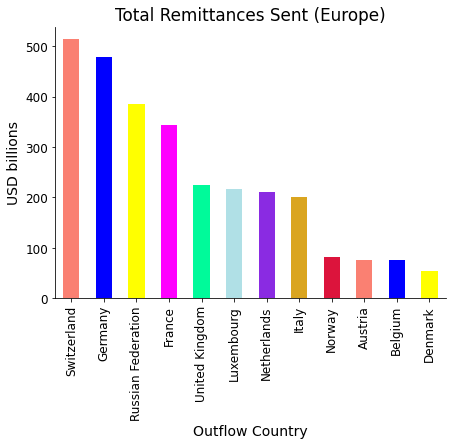

In [217]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
eu.total_rem[:12].plot(kind='bar', title='Total Remittances Sent (Europe)', ylabel='USD billions', color=colors, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Europe Trends Over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1684144390.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


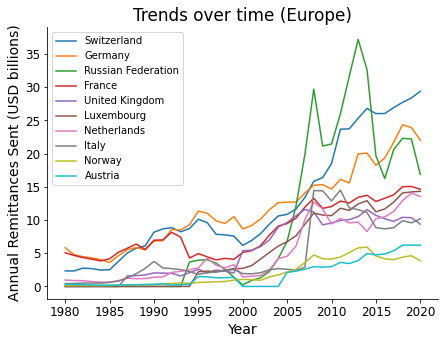

In [218]:
euu = eu.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Europe)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    euu.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [232]:
# Ukraine probe
foo = outrem0.drop('total_rem', axis=1).set_index('Outflow Country')
foo.loc['Ukraine'].plot()
plt.close('all')    # close fig

# Asia Analysis

In [125]:
asia = out_global.loc[out_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/934496245.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


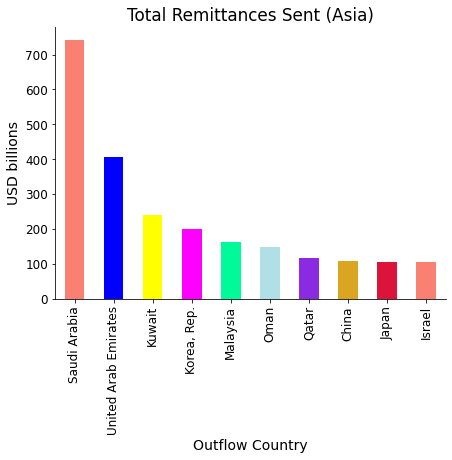

In [139]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
asia.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (Asia)', ylabel='USD billions', color=colors, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Trends over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1960359573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


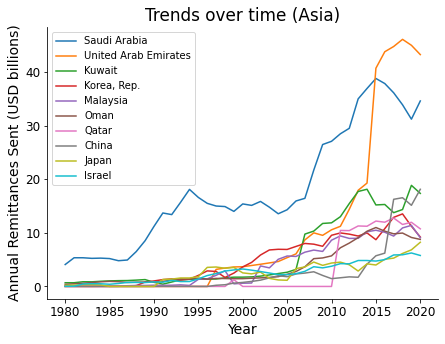

In [144]:
asiaa = asia.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Asia)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    asiaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East Asia & the Pacific Analysis

In [140]:
eap = out_global.loc[out_global.region == 'EAP']
eap = eap.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/4163497627.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


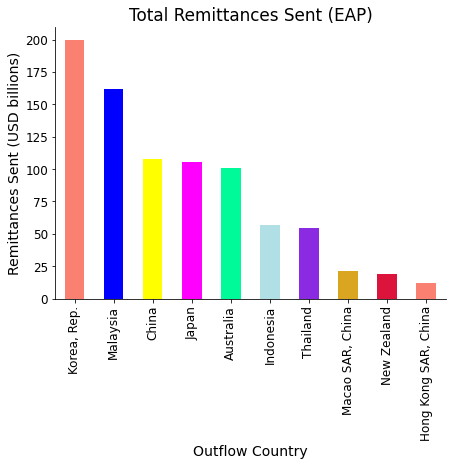

In [174]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
eap.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (EAP)', ylabel='Remittances Sent (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EAP Trends over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1999341059.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


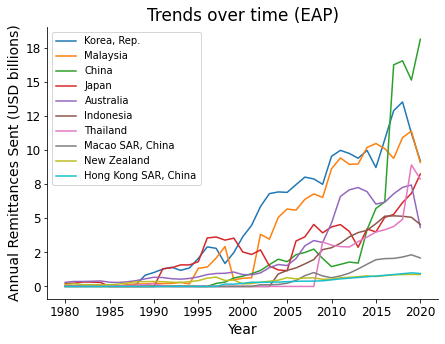

In [147]:
eapp = eap.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EAP)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eapp.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## South Asia Analysis

In [180]:
sas = out_global.loc[out_global.region == 'SAS']
sas = sas.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2878039548.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


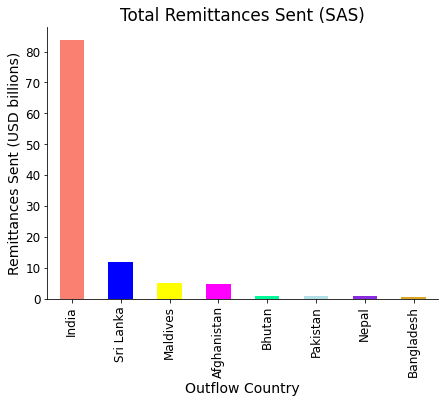

In [179]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
sas.total_rem[:15].plot(kind='bar', title='Total Remittances Sent (SAS)', ylabel='Remittances Sent (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### SAS Trends Over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2702631923.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


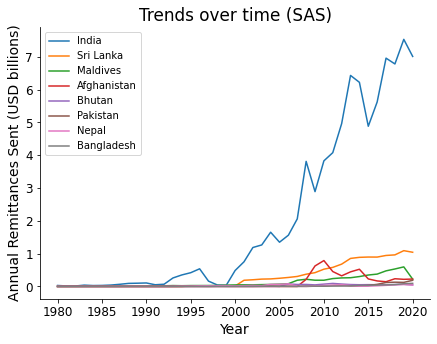

In [149]:
sass = sas.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (SAS)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(len(SAS)):
    sass.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Middle East & North Africa (MENA) Analysis

In [229]:
mena = out_global.loc[out_global.region == 'MENA']
mena = mena.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1300395111.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


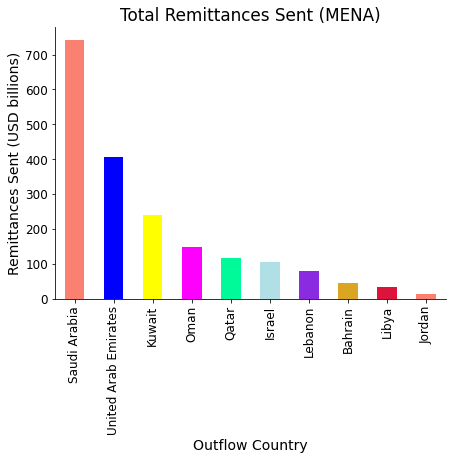

In [230]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
mena.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (MENA)', ylabel='Remittances Sent (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### MENA Trends Over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3091710187.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


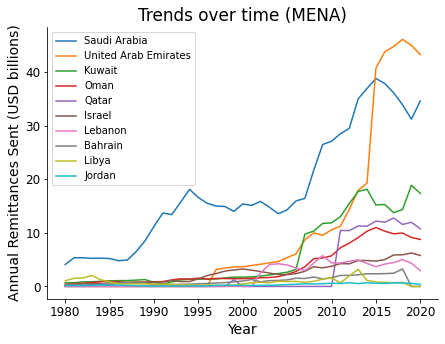

In [231]:
menaa = mena.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (MENA)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    menaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

# Eurasia Analysis

## Eastern Europe & Central Asia Analysis

In [181]:
euca = out_global.loc[out_global.region == 'EUCA']
euca = euca.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3648695281.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


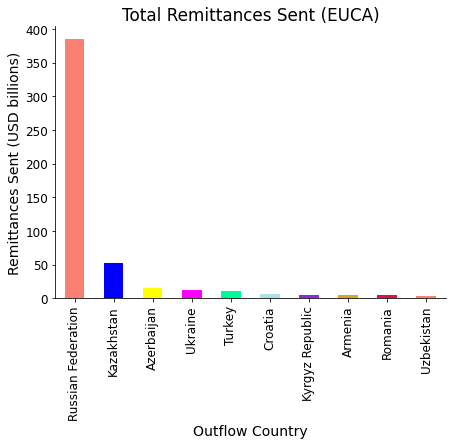

In [185]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
euca.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (EUCA)', ylabel='Remittances Sent (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EUCA Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3124493559.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


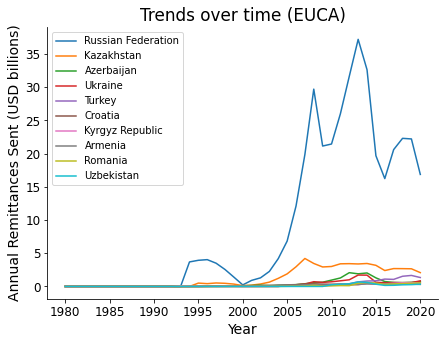

In [151]:
eucaa = euca.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EUCA)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eucaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [152]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean Analysis

In [183]:
lac = out_global.loc[out_global.region == 'LAC']
lac = lac.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/205861171.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


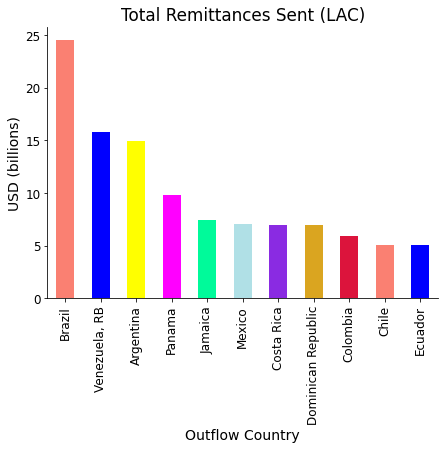

In [186]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
lac.total_rem[:11].plot(kind='bar', color=colors, title='Total Remittances Sent (LAC)', ylabel='USD (billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### LAC Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/3957049442.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


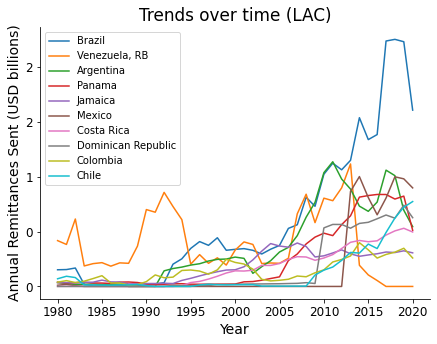

In [156]:
lacc = lac.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (LAC)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    lacc.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Africa Analysis

In [187]:
africa = out_global.loc[out_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/808919320.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


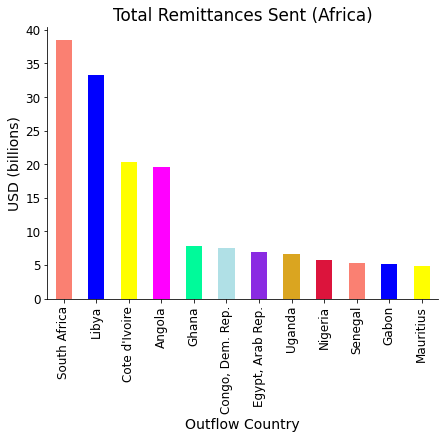

In [188]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
africa.total_rem[:12].plot(kind='bar', color=colors, title='Total Remittances Sent (Africa)', ylabel='USD (billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Africa Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2986326306.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


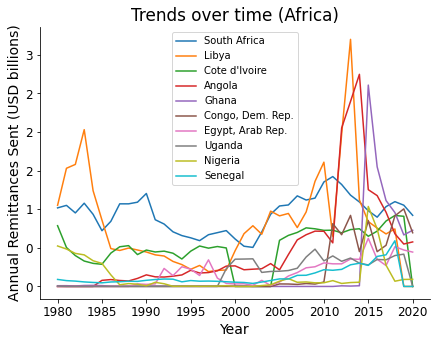

In [158]:
africaa = africa.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Africa)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    africaa.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## West & Central Africa Analysis

In [ ]:
wcaf = out_global.loc[out_global.region == 'WCAF']
wcaf = wcaf.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2937132808.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


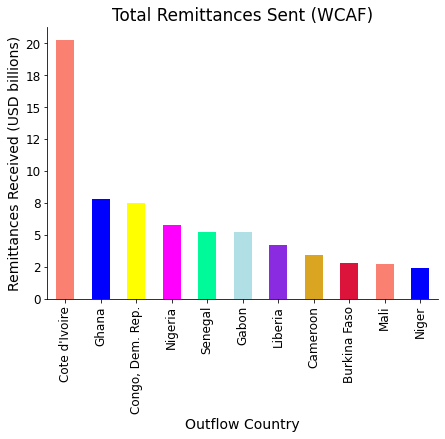

In [190]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
wcaf.total_rem[:11].plot(kind='bar', title='Total Remittances Sent (WCAF)', ylabel='Remittances Received (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### WCAF Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/2681683332.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


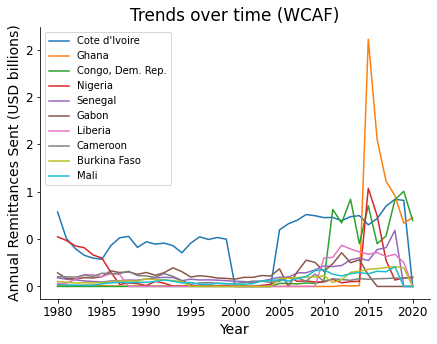

In [166]:
wcaff = wcaf.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (WCAF)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    wcaff.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East & Southern Africa Analysis

In [191]:
esaf = out_global.loc[out_global.region == 'ESAF']
esaf = esaf.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1673571313.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


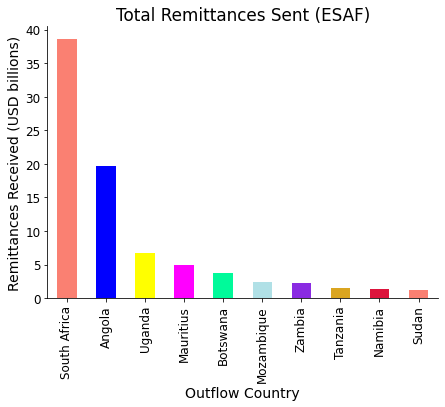

In [193]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
esaf.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (ESAF)', ylabel='Remittances Received (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### ESAF Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_9731/1639243138.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


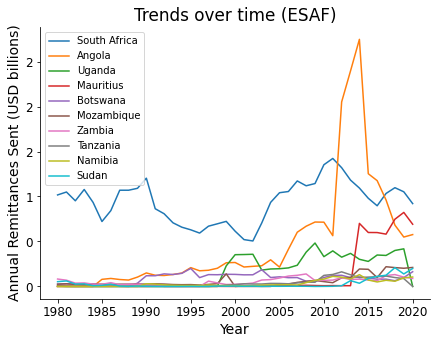

In [171]:
esaff = esaf.drop(['total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (ESAF)', xlabel='Year', ylabel='Annual Remittances Sent (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    esaff.iloc[i].plot(fontsize=12)
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [194]:
plt.close('all')